# C3M1: Peer Reviewed Assignment

### Outline:
The objectives for this assignment:

1. Apply Binomial regression methods to real data.
2. Understand how to analyze and interpret binomial regression models.
3. Flex our math skills by determining whether certain distributions are members of the exponential family.

General tips:

1. Read the questions carefully to understand what is being asked.
2. This work will be reviewed by another human, so make sure that you are clear and concise in what your explanations and answers.

In [43]:
# Load required libraries
library(tidyverse)
library(dplyr)

## Problem 1: Binomial (Logistic) Regression

The National Institute of Diabetes and Digestive and Kidney Diseases conducted a study of 768 adult female Pima Indians living near Phoenix, AZ. The purpose of the study was to investigate the factors related to diabetes. 

*Before we analyze these data, we should note that some have raised ethical issues with its collection and popularity in the statistics and data science community. We should think seriously about these concerns. For example, Maya Iskandarani wrote a brief [piece](https://researchblog.duke.edu/2016/10/24/diabetes-and-privacy-meet-big-data/) on consent and privacy concerns raised by this dataset. After you familarize yourself with the data, we'll then turn to these ethical concerns.*


First, we'll use these data to get some practice with GLM and Logistic regression.

In [44]:
# Load the data
pima = read.csv("pima.txt", sep="\t")
# Here's a description of the data: https://rdrr.io/cran/faraway/man/pima.html
head(pima)

,pregnant,glucose,diastolic,triceps,insulin,bmi,diabetes,age,test
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1
6,5,116,74,0,0,25.6,0.201,30,0


### 1. (a) Data Cleaning? What about Data Scrubbing? Data Sterilizing?

This is a real data set, which means that there's likely going to be gaps and missing values in the data. Before doing any modeling, we should inspect the data and clean it if necesary.

Perform simple graphical and numerical summaries of the data. Pay attention for missing or nonsensical values. Can you find any obvious irregularities? If so, take appropriate steps to correct these problems. In the markdown cell, specify what cleaning you did and why you did it.

Finally, split your data into training and test sets. Let the training set contain $80\%$ of the rows and the test set contain the remaining $20\%$.

    pregnant         glucose        diastolic         triceps     
 Min.   : 0.000   Min.   :  0.0   Min.   :  0.00   Min.   : 0.00  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 62.00   1st Qu.: 0.00  
 Median : 3.000   Median :117.0   Median : 72.00   Median :23.00  
 Mean   : 3.845   Mean   :120.9   Mean   : 69.11   Mean   :20.54  
 3rd Qu.: 6.000   3rd Qu.:140.2   3rd Qu.: 80.00   3rd Qu.:32.00  
 Max.   :17.000   Max.   :199.0   Max.   :122.00   Max.   :99.00  
    insulin           bmi           diabetes           age       
 Min.   :  0.0   Min.   : 0.00   Min.   :0.0780   Min.   :21.00  
 1st Qu.:  0.0   1st Qu.:27.30   1st Qu.:0.2437   1st Qu.:24.00  
 Median : 30.5   Median :32.00   Median :0.3725   Median :29.00  
 Mean   : 79.8   Mean   :31.99   Mean   :0.4719   Mean   :33.24  
 3rd Qu.:127.2   3rd Qu.:36.60   3rd Qu.:0.6262   3rd Qu.:41.00  
 Max.   :846.0   Max.   :67.10   Max.   :2.4200   Max.   :81.00  
      test      
 Min.   :0.000  
 1st Qu.:0.000  
 Median :0.000  
 

    pregnant         glucose        diastolic         triceps     
 Min.   : 0.000   Min.   : 56.0   Min.   : 24.00   Min.   : 7.00  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 62.00   1st Qu.:21.00  
 Median : 2.000   Median :119.0   Median : 70.00   Median :29.00  
 Mean   : 3.301   Mean   :122.6   Mean   : 70.66   Mean   :29.15  
 3rd Qu.: 5.000   3rd Qu.:143.0   3rd Qu.: 78.00   3rd Qu.:37.00  
 Max.   :17.000   Max.   :198.0   Max.   :110.00   Max.   :63.00  
    insulin            bmi           diabetes           age       
 Min.   : 14.00   Min.   :18.20   Min.   :0.0850   Min.   :21.00  
 1st Qu.: 76.75   1st Qu.:28.40   1st Qu.:0.2697   1st Qu.:23.00  
 Median :125.50   Median :33.20   Median :0.4495   Median :27.00  
 Mean   :156.06   Mean   :33.09   Mean   :0.5230   Mean   :30.86  
 3rd Qu.:190.00   3rd Qu.:37.10   3rd Qu.:0.6870   3rd Qu.:36.00  
 Max.   :846.00   Max.   :67.10   Max.   :2.4200   Max.   :81.00  
      test       
 Min.   :0.0000  
 1st Qu.:0.0000  
 Median 

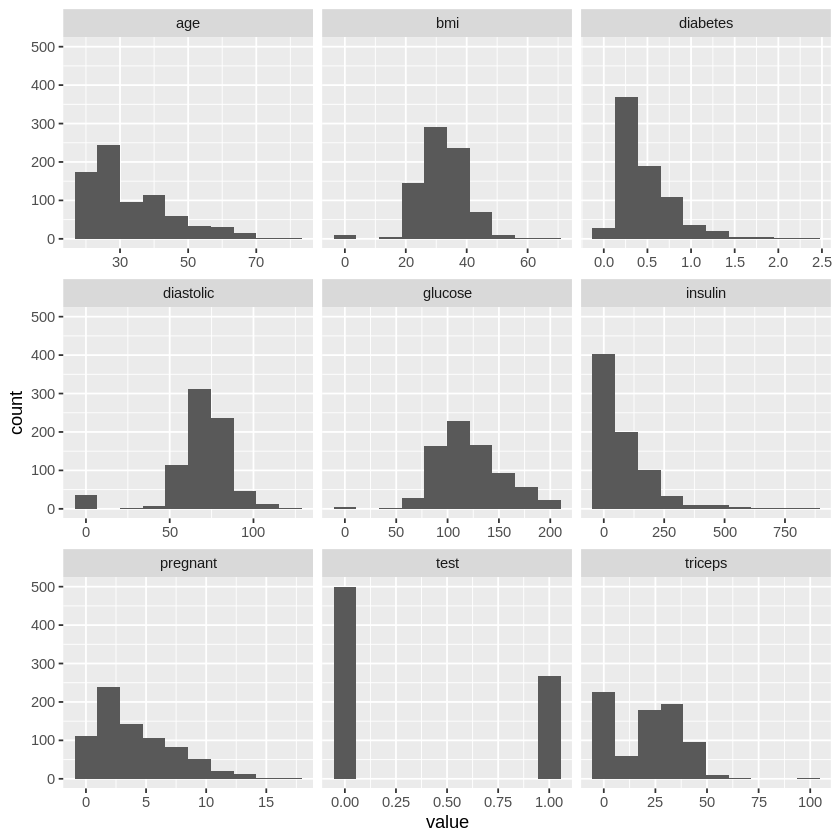

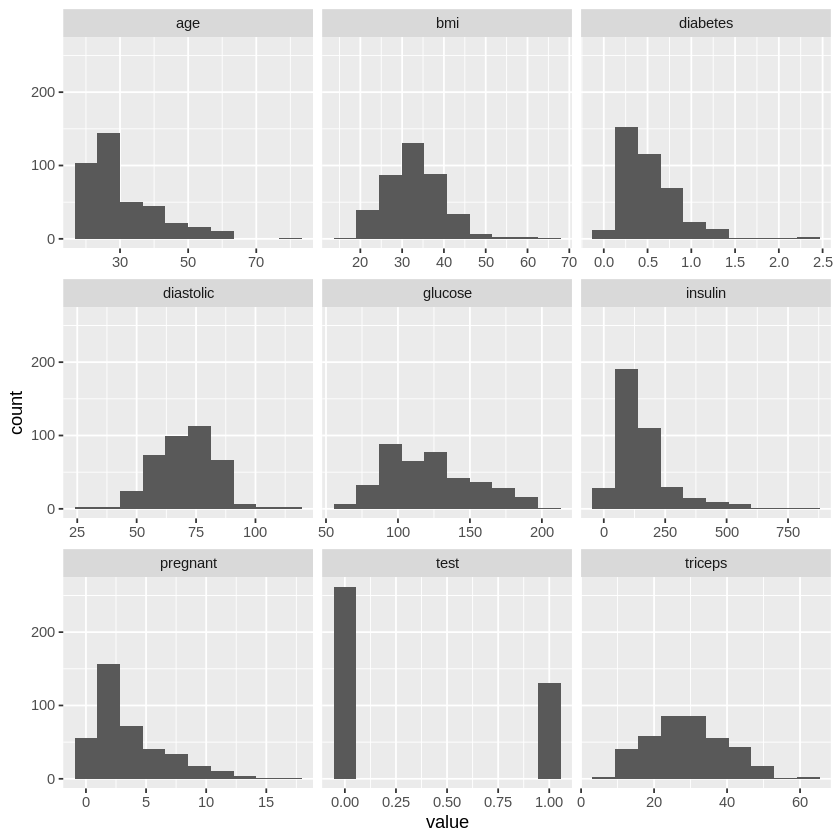

In [45]:
summary(pima)
pima_long <- pima %>%
  pivot_longer(cols = everything(), names_to = "variable", values_to = "value")

# Create histograms using ggplot2
ggplot(pima_long, aes(x = value)) +
  geom_histogram(bins = 10) +
  facet_wrap(~ variable, scales = "free_x")
  
pima_filtered <- pima %>%
  filter(glucose != 0, diastolic != 0, triceps != 0, bmi != 0, insulin != 0)
summary(pima_filtered) 
pima_filtered_long <- pima_filtered %>%
  pivot_longer(cols = everything(), names_to = "variable", values_to = "value")

# Create histograms using ggplot2
ggplot(pima_filtered_long, aes(x = value)) +
  geom_histogram(bins = 10) +
  facet_wrap(~ variable, scales = "free_x")
  
  

set.seed(1234)
rows <- nrow(pima_filtered)
training_number = floor(0.8 * rows)
random_rows = sample(seq_len(rows), size = training_number)
training_set = pima_filtered[random_rows, ]
test_set = pima_filtered[-random_rows, ]

first we created some histograms. We noticed there was some values of 0 that shouldn't be there. we then went and removed the rows with the bad data. the new histograms show better data. 

### 1. (b) Initial GLM modelling


Our data is clean and we're ready to fit! What kind of model should we use to fit these data? Notice that the `test` variable is either $0$ or $1$, for whether the individual tested positive for diabetes. Because `test` is binary, we should use logistic regression (which is a kind of binomial regression).

Fit a model with `test` as the response and all the other variables as predictors. Can you tell whether this model fits the data?

In [46]:
glmod_pima = glm(test ~ ., data = training_set, family = binomial)
summary(glmod_pima)


Call:
glm(formula = test ~ ., family = binomial, data = training_set)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.0076  -0.6335  -0.3429   0.5488   2.3485  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.138e+01  1.536e+00  -7.411 1.25e-13 ***
pregnant     1.261e-01  6.489e-02   1.943  0.05196 .  
glucose      3.974e-02  6.644e-03   5.981 2.22e-09 ***
diastolic    2.119e-03  1.366e-02   0.155  0.87672    
triceps     -1.389e-04  1.940e-02  -0.007  0.99429    
insulin     -9.994e-04  1.568e-03  -0.637  0.52398    
bmi          1.034e-01  3.290e-02   3.144  0.00167 ** 
diabetes     1.552e+00  4.970e-01   3.123  0.00179 ** 
age          2.423e-02  2.160e-02   1.122  0.26189    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 393.68  on 312  degrees of freedom
Residual deviance: 263.45  on 304  degrees of freedom
AIC: 281.45

Num

we can't tell if the model fits yet, since it's normal

### 1. (c) Remember Bayes

A quick analytical interlude.

Is diastolic blood pressure significant in the regression model? Do women who test positive have higher diastolic blood pressures? Explain the distinction between the two questions and discuss why the answers are only apparently contradictory.

In [47]:
lmod = lm(diastolic ~ test, data = training_set)
summary(lmod)


Call:
lm(formula = diastolic ~ test, data = training_set)

Residuals:
    Min      1Q  Median      3Q     Max 
-44.807  -8.807   1.193   8.089  37.193 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  68.8066     0.8349  82.416  < 2e-16 ***
test          5.1043     1.4697   3.473 0.000588 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 12.16 on 311 degrees of freedom
Multiple R-squared:  0.03734,	Adjusted R-squared:  0.03424 
F-statistic: 12.06 on 1 and 311 DF,  p-value: 0.0005876


while the test estimate is higher than the intercept, it's not significant. 
we are comparing diastolic to the test, and then test to the diastolic, which are not the same

### 1. (d) GLM Interpretation

We've seen so many regression summaries up to this point, how is this one different from all the others? Well, to really understand any model, it can be helpful to loop back and plug the fitted results back into the model's mathematical form.

Explicity write out the equation for the binomial regression model that you fit in (b). Then, in words, explain how a $1$ unit change of `glucose` affects `test`, assuming all other predictors are held constant.

In [48]:
# Your Code Here

the equation is β0​+β1​⋅pregnant+β2​⋅glucose+β3​⋅diastolic+β4​⋅triceps+β5​⋅insulin+β6​⋅bmi+β7​⋅diabetes+β8​⋅age

a one-unit increase in glucose level is associated with an increase in the log-odds of testing positive for diabetes by 0.037. This translates to the odds of a positive diabetes test increasing by a factor of e0.037≈1.038. Therefore, a one-unit increase in glucose increases the odds of a positive diabetes test by approximately 3.8%.

### 1. (e) GLM Prediction

One of the downsides of Logistic Regression is that there isn't an easy way of evaulating the goodness of fit of the model without predicting on new data. But, if we have more data to test with, then there are many methods of evaluation to use. One of the best tools are confusion matrices, which (despite the name) are actually not that hard to understand.

A confusion matrix compares the predicted outcomes of a Logistic Regression Model (or any classification model) with the actual classifications. For binary classification, it is a $2 \times 2$ matrix where the rows are the models' predicted outcome and the columns are the actual classifications. An example is displayed below.

|  | True | False |  
| --- | --- | --- |
| 1 | 103 | 37 |  
| 0 | 55  | 64 |  

In the example, we know the following information:
* The [1,1] cell is the number of datapoints that were correctly predicted to be $1$. The value (103) is the number of True Positives (TP). 
* The [2,2] cell is the number of datapoints that were correctly predicted to be $0$. The value is the number of True Negatives (TN).
* The [1, 2] cell is the number of datapoints that were predicted to be $1$ but where actually $0$. This is the number of False Positives (FP), also called Type I error. In the context of our diabetes dataset, this would mean our model predicted that the person would have diabetes, but they actually did not.
* The [2, 1] cell is the number of datapoints that were predicted to be $0$ but where actually $1$. This is the number of False Negatives (FN), also called Type 2 error. In the context of our diabetes dataset, this would mean our model predicted that the person would not have diabetes, but they actually did have diabetes.

Use your model to predict the outcomes of the test set. Then construct a confusion matrix for these predictions and display the results.

In [49]:
actual_test_values <- as.numeric(as.character(test_set$test))
predicted_probabilities <- predict(glmod_pima, type = "response", newdata = test_set, na.action = na.exclude)

binary_prediction <- ifelse(predicted_probabilities > 0.5, 1, 0)


true_neg = sum(binary_prediction == 0 & actual_test_values == 0)
true_pos = sum(binary_prediction == 1 & actual_test_values == 1)
false_pos = sum(binary_prediction == 1 & actual_test_values == 0)
false_neg = sum(binary_prediction == 0 & actual_test_values == 1)


confusion_matrix <- matrix(c(true_pos, false_neg, false_pos, true_neg), nrow = 2, byrow = TRUE,
                           dimnames = list('Predicted' = c('Positive', 'Negative'),
                                           'Actual' = c('Positive', 'Negative')))
confusion_matrix

,Positive,Negative
Positive,17,12
Negative,5,45


### 1. (f) Evaluation Statistics

Using the four values from the confusion matrix, we can construct evaulation statistics to get a numerical approximation for our model's performance. Spend some time researching accuracy, precision, recall and F score. 

Calculate these values for your model's predictions on the test set. Clearly display your results. How well do you think your model fits the data?

In [50]:
accuracy = (true_pos+true_neg)/dim(test_set)[1]
accuracy
precision = true_pos/(true_pos + false_pos)
precision
recall = true_pos/(true_pos + false_neg)
recall
f_score = (2*precision*recall)/(precision + recall)
f_score

[1] 0.7848101

[1] 0.7727273

[1] 0.5862069

[1] 0.6666667

the higher the F the better. an F of .66 is pretty good

### 1. (g) Understanding Evaluation Statistics

Answer the following questions in the markdown cell below.

1. Give an example scenario for when accuracy would be a misleading evaulation statistic.
2. Confusion matrices can also be used for non-binary classification problems. Describe what a confusion matrix would look like for a response with $3$ levels.
3. You'll have to take our word on the fact (or spend some time researching) that Type I error and Type II error are inversely related. That is, if a model is very good at detecting false positives, then it will be bad at detecting false negatives. In the case of our diabetes dataset, would you prefer a model that overestimates the Type 1 error or overestimates the Type II error. Justify your answer.

1. Accuracy can be misleading in scenarios such as a medical test for a rare disease where only 1% of the population has the disease. If the model simply predicts that no one has the disease (i.e., always predicts the negative class), it will have an accuracy of 99%
2. For a response variable with 3 levels, the confusion matrix would be a 3x3 matrix, with each row representing the actual class and each column representing the predicted class. The diagonal elements represent the number of correct predictions for each class, while the off-diagonal elements represent the misclassifications. 
3. In the context of the diabetes dataset, it would be preferable to have a model that overestimates Type I error rather than Type II error . The consequences of missing a diabetes diagnosis are much more severe than the consequences of an unnecessary additional test. Therefore, it is better to have a model that errs on the side of caution by overestimating Type I errors to ensure that fewer cases of diabetes are missed.

### 1. (h) Ethical Issues in Data Collection

Read Maya Iskandarani's [piece](https://researchblog.duke.edu/2016/10/24/diabetes-and-privacy-meet-big-data/) on consent and privacy concerns raised by this dataset. Summarize those concerns here.

The ethical concerns surrounding this dataset stem from the complexity of obtaining informed consent for long-term studies, as participants cannot be fully informed about future uses of their data. The public accessibility of this personal and sensitive information, such as blood pressure and BMI, raises significant privacy issues. this highlights the need to balance the benefits of medical research with the protection of individuals' privacy and autonomy.

## Problem 2: Practicing those Math skills

One of the conditions of GLMs is that the "random component" of the data needs to come from the Exponential Family of Distributions. But how do we know if a distribution is in the Exponential Family? Well, we could look it up. Or we could be proper mathematicians and check the answer ourselves! Let's flex those math muscles.

### 2. (a) But it's in the name...

Show that $Y \sim exponential(\lambda)$, where $\lambda$ is known, is a member of the exponential family.

pdf of expnential is


$$
f_Y(y; \lambda) = \lambda e^{-\lambda y}
$$

This can be rewritten in the form of the exponential family as:

$$
f_Y(y; \lambda) = \exp \left( \frac{\lambda y - \log(\lambda)}{-1} \right)
$$

### 2. (b) Why can't plants do math? Because it gives them square roots!

Let $Y_i \sim exponential(\lambda)$ where $i \in \{ 1, \dots, n\}$. Then $Z = \sum_{i=1}^n Y_i \sim Gamma(n, \lambda)$. Show that $Z$ is also a member of the exponential family.

The pdf of a Gamma is

$$
f_Z(z; n, \lambda) = \frac{\lambda^n}{\Gamma(n)} z^{n-1} e^{-\lambda z}
$$

which is in the form of the exponential famil